In [76]:
from imp import reload
import pandas as pd
import numpy as np
from admin import admin_send_message
from scripts.delete_user_from_db import initialize_database
from sqlalchemy import and_, desc, exists
from datetime import datetime, timedelta
import models
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
session = initialize_database('production')

In [3]:
start_date = datetime(year=2018, month=6, day=29)

In [4]:
s1 = models.User.created_at > start_date
s2 = ~models.User.first_name.in_(['Yuya', 'Rintaro'])
new_users = session.query(models.User).filter(and_(s1, s2)).order_by(desc(models.User.id)).all()

In [5]:
len(new_users)

146

In [40]:
new_user_ids = [i.id for i in new_users]
print(new_user_ids[-5:])

[746, 745, 744, 743, 742]


In [7]:
new_messages = session.query(models.Message).filter(models.Message.user_id.in_(new_user_ids)).all()

In [8]:
len(new_messages)

2631

In [9]:
s1 = models.User.status.in_([0,1])
s2 = models.User.id.in_(new_user_ids)
intro_users = session.query(models.User).filter(and_(s1, s2)).all()

In [10]:
len(intro_users)

38

In [11]:
s1 = exists().where(
    and_(
        models.Session.user_id == models.User.id,
        models.Session.status != 4
    )
)
s2 = models.User.id.in_(new_user_ids)
s3 = models.User.status == 2

regular_convo_users = session.query(models.User).filter(and_(s1,s2,s3)).all()
# prepared_users = session.query(models.User).filter(and_(exists().where(and_(models.Session.user_id = models.User.id, models.Session.status != 4)),s2,s3)).all()

In [12]:
len(regular_convo_users)

84

In [13]:
regular_convo_user_ids = [i.id for i in regular_convo_users]

In [17]:
msg_per_user = []
for i in regular_convo_user_ids:
    s1 = models.Message.user_id == i
    s2 = models.Message.payload == ''
    messages = session.query(models.Message).filter(and_(s1, s2)).all()
    msg_per_user.append(len(messages))

742
744
745
747
749
751
752
753
754
755
756
757
758
759
760
765
766
769
770
773
776
777
778
781
782
786
787
792
793
794
797
799
801
802
804
805
806
807
808
810
813
816
818
821
822
823
824
825
828
829
830
835
836
837
841
844
847
849
850
852
853
854
855
856
858
860
861
862
866
867
869
870
872
873
874
875
878
879
880
881
882
883
884
885


In [19]:
average_msg_per_user = np.sum(msg_per_user)/len(msg_per_user)
print(average_msg_per_user)

15.6547619048


In [33]:
msg_per_session = []
for i in regular_convo_user_ids:
    s2 = models.Session.user_id == i
    regular_session = session.query(models.Session).filter(and_(s2)).order_by(models.Session.id).limit(1).all()
    messages = session.query(models.Message).filter(models.Message.session_id == regular_session[0].id).all()
    msg_per_session.append(len(messages))

In [34]:
avg_msg_per_ssn = np.sum(msg_per_session)/len(msg_per_session)
print(avg_msg_per_ssn)

11.5833333333


In [35]:
returned_users = []
for i in regular_convo_user_ids:
    s2 = models.Session.user_id == i
    regular_session = session.query(models.Session).filter(and_(s2)).order_by(models.Session.id).limit(2).all()
    if len(regular_session) == 2:
        returned_users.append(i)

In [36]:
print(returned_users)

[745, 757, 778, 793, 822, 841, 879]


In [47]:
s1 = models.Session.user_id.in_(new_user_ids)
s2 = models.Session.mood_end != ''
completed_sessions = session.query(models.Session).filter(and_(s1, s2)).order_by(models.Session.id).all()

In [49]:
len(completed_sessions)

17

In [52]:
from admin import get_convo_info
reload(get_convo_info)

<module 'admin.get_convo_info' from '/Users/yuya.t/jullie/admin/get_convo_info.py'>

In [54]:
get_convo_info.get_convo_info(6, 22,6,29)


new users
 99 [645, 644, 643, 642, 641]

new messages
 1453

intro users
 41

new regular convo users
 50

average messages per user
 12.36

average messages per session
 9.94

returned users
 [675, 677, 678, 704, 732, 734]

completed sessions
 0


In [55]:
get_convo_info.get_convo_info(6,15, 6,22)


new users
 51 [562, 561, 560, 559, 558]

new messages
 764

intro users
 15

new regular convo users
 1

average messages per user
 0.0

average messages per session
 6.0

returned users
 [564]

completed sessions
 4


In [56]:
get_convo_info.get_convo_info(6,8,6,15)


new users
 54 [508, 507, 506, 505, 504]

new messages
 1083

intro users
 16

new regular convo users
 1

average messages per user
 4.0

average messages per session
 13.0

returned users
 [533]

completed sessions
 9


In [61]:
message_count = []
for i in regular_convo_user_ids:
    s1 = models.Message.user_id == i
    s2 = models.Message.payload == ''
    messages = session.query(models.Message).filter(and_(s1, s2)).all()
    message_count.append(len(messages))


In [63]:
users_with_30_msg = [i for i in message_count if i > 30]

In [65]:
len(users_with_30_msg)

11

In [66]:
np.sum(users_with_30_msg)/len(users_with_30_msg)

51.18181818181818

In [67]:
np.max(users_with_30_msg)

102

In [69]:
message_count.sort()

In [70]:
message_count

[1,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 11,
 11,
 11,
 12,
 12,
 12,
 13,
 13,
 14,
 14,
 16,
 18,
 18,
 18,
 19,
 20,
 20,
 23,
 24,
 25,
 26,
 27,
 28,
 28,
 29,
 29,
 31,
 33,
 35,
 35,
 38,
 41,
 45,
 48,
 74,
 81,
 102]

(array([ 12.,   9.,  15.,  11.,   3.,   5.,   2.,   1.,   4.,   2.,   1.,
          2.,   2.,   4.,   1.,   1.,   2.,   0.,   1.,   1.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   1.  ,    3.02,    5.04,    7.06,    9.08,   11.1 ,   13.12,
          15.14,   17.16,   19.18,   21.2 ,   23.22,   25.24,   27.26,
          29.28,   31.3 ,   33.32,   35.34,   37.36,   39.38,   41.4 ,
          43.42,   45.44,   47.46,   49.48,   51.5 ,   53.52,   55.54,
          57.56,   59.58,   61.6 ,   63.62,   65.64,   67.66,   69.68,
          71.7 ,   73.72,   75.74,   77.76,   79.78,   81.8 ,   83.82,
          85.84,   87.86,   89.88,   91.9 ,   93.92,   95.94,   97.96,
          99.98,  102.  ]),
 <a list of 50 Patch objects>)

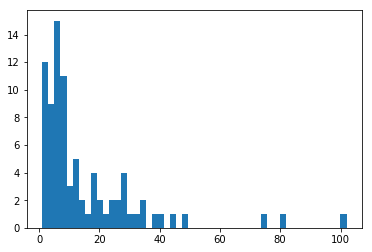

In [79]:
plt.hist(message_count, bins=50)